<a href="https://colab.research.google.com/github/ayush-singh110/CaloriesBurntPrediction/blob/main/CaloriesBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df1=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')
df=pd.merge(df1,df2,how='outer')
df.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,male,23,169.0,73.0,25.0,102.0,40.7


In [ ]:
df_c=df.copy()
df_c.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,male,23,169.0,73.0,25.0,102.0,40.7


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df_c.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
df_c.duplicated().sum()

np.int64(0)

In [ ]:
df_c.drop('User_ID',inplace=True,axis=1)

In [ ]:
df_c.head(5)

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,122.0,male,23,169.0,73.0,25.0,102.0,40.7


In [ ]:
encod=OneHotEncoder()
encoded=encod.fit_transform(df_c[['Gender']]).toarray()
encoded_df=pd.DataFrame(encoded,columns=encod.get_feature_names_out(['Gender']))
df_c=pd.concat([df_c,encoded_df],axis=1)
df_c

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,76.0,female,67,176.0,74.0,12.0,103.0,39.6,1.0,0.0
1,93.0,female,34,178.0,79.0,19.0,96.0,40.6,1.0,0.0
2,49.0,female,38,178.0,77.0,14.0,82.0,40.5,1.0,0.0
3,36.0,female,39,169.0,66.0,8.0,90.0,39.6,1.0,0.0
4,122.0,male,23,169.0,73.0,25.0,102.0,40.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14995,129.0,female,25,169.0,66.0,22.0,105.0,40.6,1.0,0.0
14996,42.0,female,31,170.0,69.0,9.0,93.0,39.8,1.0,0.0
14997,112.0,male,21,176.0,75.0,19.0,109.0,40.5,0.0,1.0
14998,42.0,female,36,152.0,54.0,10.0,86.0,39.7,1.0,0.0


In [ ]:
df_c.drop('Gender',inplace=True,axis=1)

In [ ]:
df_c.corr()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
Calories,1.000000,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,-0.022357,0.022357
Age,0.154395,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,-0.003222,0.003222
Height,0.017537,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,-0.710534,0.710534
Weight,0.035481,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,-0.783186,0.783186
Duration,0.955421,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,-0.003440,0.003440
Heart_Rate,0.897882,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,-0.011555,0.011555
Body_Temp,0.824558,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,-0.007264,0.007264
Gender_female,-0.022357,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,1.000000,-1.000000
Gender_male,0.022357,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,-1.000000,1.000000


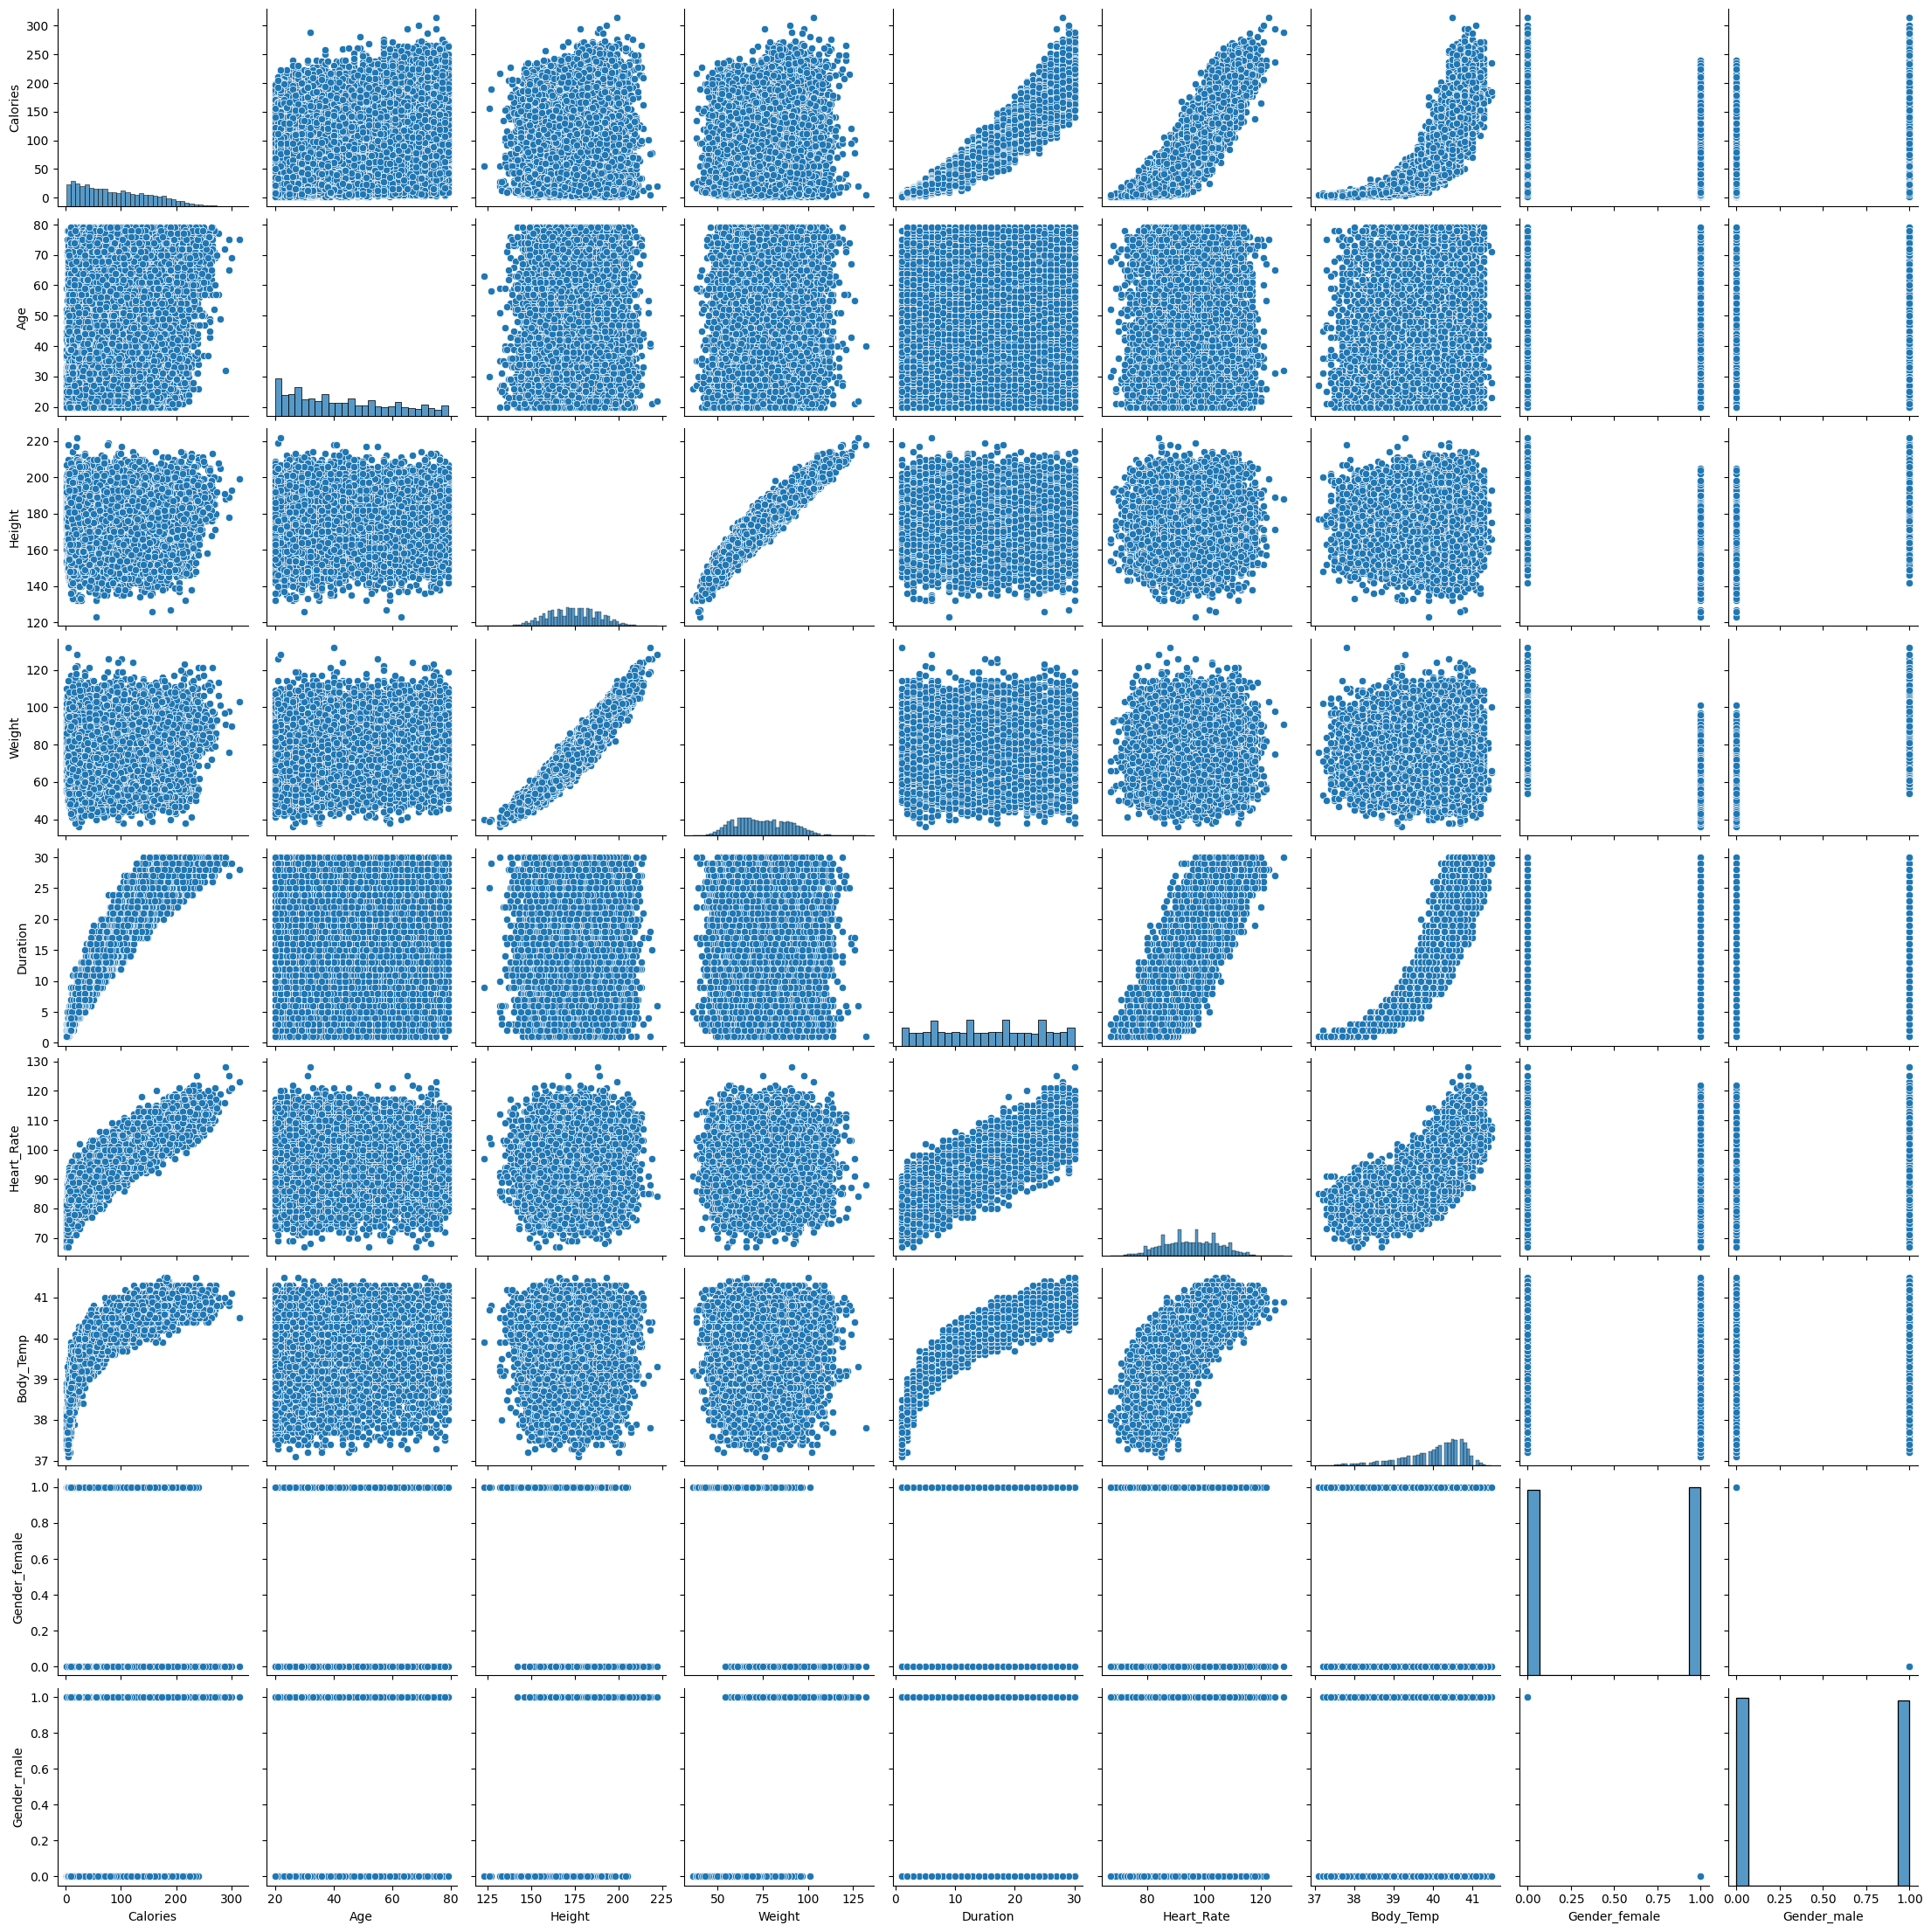

In [ ]:
sns.pairplot(df_c)

<BarContainer object of 15000 artists>

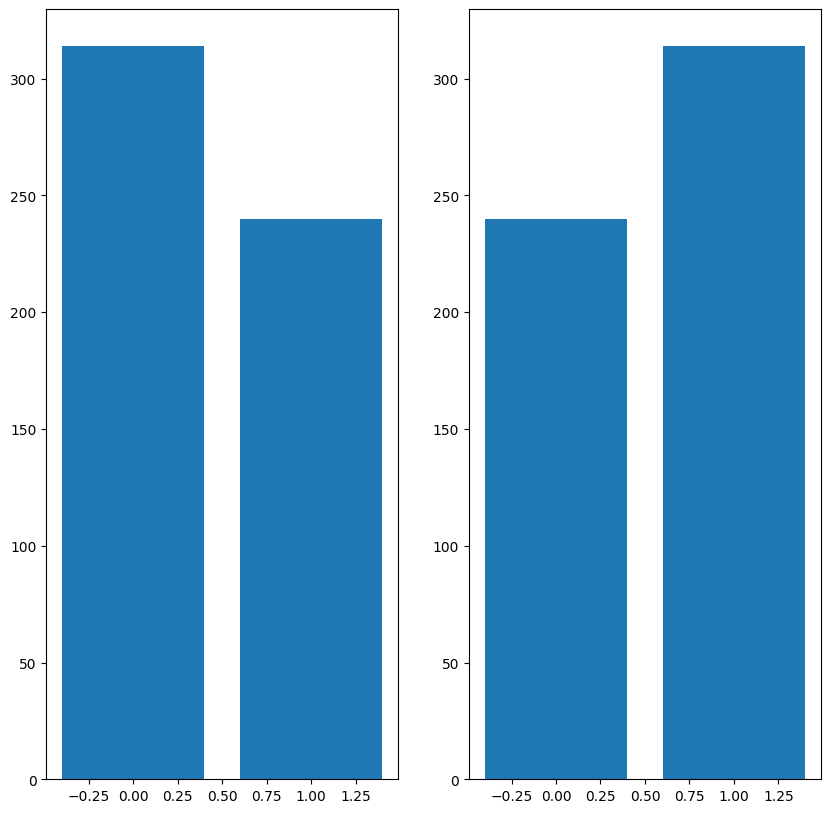

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.bar(df_c['Gender_female'],df_c['Calories'])
plt.subplot(1,2,2)
plt.bar(df_c['Gender_male'],df_c['Calories'])

<BarContainer object of 15000 artists>

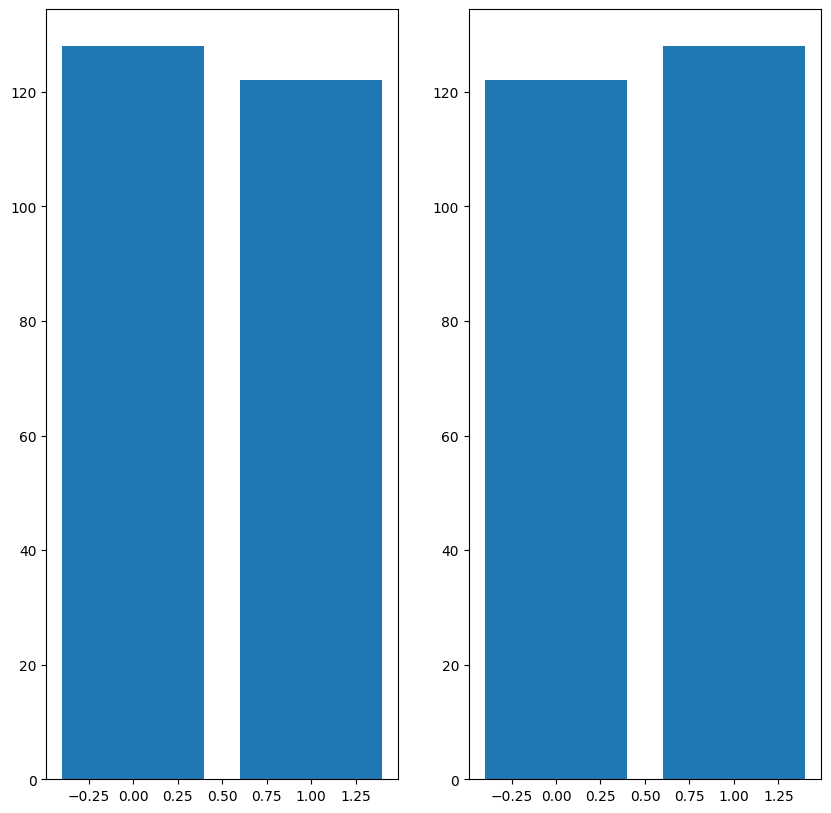

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.bar(df_c['Gender_female'],df_c['Heart_Rate'])
plt.subplot(1,2,2)
plt.bar(df_c['Gender_male'],df_c['Heart_Rate'])

<BarContainer object of 15000 artists>

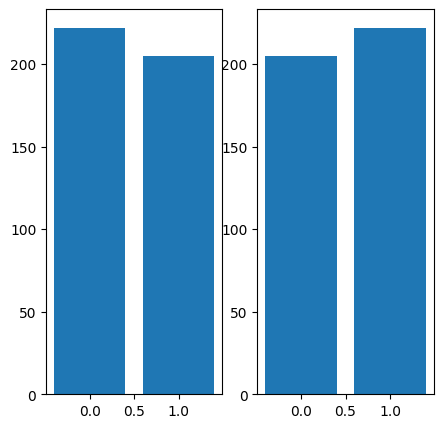

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.bar(df_c['Gender_female'],df_c['Height'])
plt.subplot(1,2,2)
plt.bar(df_c['Gender_male'],df_c['Height'])

In [ ]:
X=df_c[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Gender_female','Gender_male']]
y=df_c['Calories']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([  8.46380103,  -2.50691025,   4.43320649,  55.09230759,
        18.96466711, -13.11262509,   0.3427623 ,  -0.3427623 ])

In [ ]:
reg.intercept_

np.float64(89.47024999999988)

In [ ]:
mae=mean_absolute_error(y_test,reg.predict(X_test))
mse=mean_squared_error(y_test,reg.predict(X_test))
rmse=np.sqrt(mse)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 8.423464966866892
MSE: 132.5603474171649
RMSE: 11.513485459111195


In [ ]:
score=r2_score(y_test,reg.predict(X_test))
print('R2 Score:',score)

R2 Score: 0.9666932103505417


In [ ]:
df_c.head(2)

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,76.0,67,176.0,74.0,12.0,103.0,39.6,1.0,0.0
1,93.0,34,178.0,79.0,19.0,96.0,40.6,1.0,0.0


In [ ]:
reg.predict(scaler.transform([[18,174,60,30,103,40.6,0.0,1.0]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([173.15588585])